# Introduction

**Project: Analysis of seafood restaurants in Columbus (Ohio) area based on yelp. **

**Goal: <br> 
The goal of the project is to investigate all seafood restaurants based on yelp and help recommend the best  seafood restaurant.**

**Outline:**

1. Download seafood restaurant information from yelp, including the name, price, reviews and ratings. 
2. Plot the correaltion plots between price and review, price and rating. 
3. Discussion about the plots. 
4. Conclusion and further directions. 


!image 

# Obtain data from yelp

In [3]:
from bs4 import BeautifulSoup
from urllib.parse import urlencode
from urllib.request import Request, urlopen
import requests
from pprint import pprint
from urllib.parse import urljoin
import re
import pandas as pd
import json

## Investigate a sample search result page

In [132]:
url = r'https://www.yelp.com/search?find_desc=seafood&find_loc=Columbus%2C+OH&start=1'

# Creating a request object
req_headers = {}
req_headers['user-agent'] = r'Mozilla/5.0'
req = Request(url, headers=req_headers)
# Requesting data from the website
# fill in the blanks
try:
    response = urlopen(req)
    page_content = response.read()
    bs = BeautifulSoup(page_content, 'html')
    pprint(bs.prettify())
except Exception as e:
    print(e)

/Users/cwang/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/cwang/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


('<!DOCTYPE HTML>\n'
 '<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" '
 'class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n'
 '<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" '
 'class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n'
 '<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" '
 'class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->\n'
 '<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" '
 'class="ie9 ie no-js" lang="en"> <![endif]-->\n'
 '<!--[if (gt IE 9)|!(IE)]><!-->\n'
 '<html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml">\n'
 ' <!--<![endif]-->\n'
 ' <head>\n'
 '  <script>\n'
 '   (function() {\n'
 '                var main = null;\n'
 '\n'
 '                var main=function(){window.onerror=function(k,a,c,i,f){var '
 'j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var '
 'h=f&&(f.name===

 'only screen and (max-width: 479px){.responsive '
 '.main-header_search{padding:9px 0;}}@media (-webkit-min-device-pixel-ratio: '
 '2), (min-resolution: 192dpi){.main-header--lsat '
 '.main-header_wrapper{background:#d32323;}}@media only screen and (max-width: '
 '479px){.ie .main-header--lsat .main-header_account .header-nav '
 '.header-nav_item+.header-nav_item,.ie .main-header--lsat '
 '.main_header_nav-dropdown .header-nav '
 '.header-nav_item+.header-nav_item{float:right;}}@media only screen and '
 '(max-width: 479px){.responsive .main-header--lsat .main-header_account '
 '.header-nav_item+.header-nav_item,.responsive .main-header--lsat '
 '.main_header_nav-dropdown '
 '.header-nav_item+.header-nav_item{margin-right:0;}}@media only screen and '
 '(min-width: 480px) and (max-width: 989px){.responsive .main-header--lsat '
 '.main-header_account .header-nav_item+.header-nav_item,.responsive '
 '.main-header--lsat .main_header_nav-dropdown '
 '.header-nav_item+.header-nav_item{margin

 '            </div>\n'
 '           </div>\n'
 '           <div class="lemon--div__373c0__6Tkil filterSet__373c0__2d-H0 '
 'border-color--default__373c0__2oFDT">\n'
 '            <div class="lemon--div__373c0__6Tkil '
 'display--inline-block__373c0__2de_K u-padding-r2 u-padding-l2 '
 'border-color--default__373c0__2oFDT">\n'
 '             <h4 class="lemon--h4__373c0__tEzoh heading--h4__373c0__3bU-Q '
 'alternate__373c0__1uacp">\n'
 '              Neighborhoods\n'
 '             </h4>\n'
 '             <ul class="domtags--ul__373c0__3EAkl undefined '
 'list__373c0__2G8oH">\n'
 '              <li class="domtags--li__373c0__3TKyB '
 'list-item__373c0__M7vhU">\n'
 '               <div class="lemon--div__373c0__6Tkil '
 'border-color--default__373c0__2oFDT">\n'
 '                <label class="domtags--label__373c0__32-PB '
 'checkboxFilter__373c0__3-m4v">\n'
 '                 <input name="place" type="checkbox" '
 'value="OH:Columbus::Short_North"/>\n'
 '                 <span class="lem

 '                    <div class="lemon--div__373c0__6Tkil '
 'secondaryAttributes__373c0__7bA0w arrange-unit__373c0__1piwO '
 'border-color--default__373c0__2oFDT">\n'
 '                     <div class="lemon--div__373c0__6Tkil u-padding-t-half '
 'u-padding-l2 border-color--default__373c0__2oFDT '
 'text-align--right__373c0__3fmmn">\n'
 '                      <div class="lemon--div__373c0__6Tkil '
 'display--inline-block__373c0__2de_K border-color--default__373c0__2oFDT">\n'
 '                       (614) 878-3474\n'
 '                      </div>\n'
 '                      <address class="domtags--address__373c0__cgebO">\n'
 '                       <div class="lemon--div__373c0__6Tkil '
 'display--inline-block__373c0__2de_K u-space-t1 '
 'border-color--default__373c0__2oFDT">\n'
 '                        <span class="domtags--span__373c0__1VGzF">\n'
 '                         5251 Trabue Rd\n'
 '                        </span>\n'
 '                       </div>\n'
 '                

 'href="/biz/the-fish-guys-columbus?osq=seafood" name="" rel="" target="">\n'
 '                         <img alt="" class="lemon--img__373c0__3bS5q '
 'photo-box-img__373c0__O0tbt" height="210" '
 'src="https://s3-media2.fl.yelpcdn.com/bphoto/XORzboLn2rQB-woomsud9Q/ls.jpg" '
 'srcset="https://s3-media2.fl.yelpcdn.com/bphoto/XORzboLn2rQB-woomsud9Q/258s.jpg '
 '1.03x,https://s3-media2.fl.yelpcdn.com/bphoto/XORzboLn2rQB-woomsud9Q/348s.jpg '
 '1.39x,https://s3-media2.fl.yelpcdn.com/bphoto/XORzboLn2rQB-woomsud9Q/300s.jpg '
 '1.20x" width="210"/>\n'
 '                        </a>\n'
 '                       </div>\n'
 '                      </div>\n'
 '                      <div class="lemon--div__373c0__6Tkil '
 'button__373c0__IWHDi left__373c0__3QF30 disabled__373c0__3UDIp '
 'border-color--default__373c0__2oFDT">\n'
 '                       <div aria-label="Previous" '
 'class="lemon--div__373c0__6Tkil icon__373c0__90znI '
 'border-color--default__373c0__2oFDT" role="button" tabindex="0

 'border-color--default__373c0__2oFDT">\n'
 '                     <div class="lemon--div__373c0__6Tkil '
 'arrange-unit__373c0__1piwO arrange-unit-fill__373c0__17z0h '
 'border-color--default__373c0__2oFDT">\n'
 '                      <p class="lemon--p__373c0__1hkz1 text__373c0__2pB8f '
 'text__373c0__2P1WD alternateStyling__373c0__2ithU '
 'text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_">\n'
 '                       “The imperial dip appetizer is fantastic. Next time '
 "I'll skip the entrees!\n"
 '\n'
 "I knew I wanted to order the imperial dip appetizer. I'd tried it before and "
 'knew it…”\n'
 '                       <!-- -->\n'
 '                       <a class="lemon--a__373c0__1_OnJ link__373c0__29943 '
 'link-color--blue-dark__373c0__1mhJo link-size--inherit__373c0__2JXk5" '
 'href="/biz/bonefish-grill-columbus?hrid=Jfrsaug0t0LemJfPl3Jo5A&amp;osq=seafood" '
 'name="" rel="" target="">\n'
 '                        read more\n'
 '                       </a>\n'


 '                        <div aria-label="4 star rating" '
 'class="lemon--div__373c0__6Tkil i-stars__373c0__Y2F3O '
 'i-stars--regular-4__373c0__3acau border-color--default__373c0__2oFDT '
 'overflow--hidden__373c0__8Jq2I" role="img">\n'
 '                         <img alt="" class="domtags--img__373c0__3Qx9- '
 'offscreen__373c0__1KofL" height="560" '
 'src="https://s3-media2.fl.yelpcdn.com/assets/srv0/yelp_design_web/9b34e39ccbeb/assets/img/stars/stars.png" '
 'width="132"/>\n'
 '                        </div>\n'
 '                       </span>\n'
 '                      </div>\n'
 '                      <div class="lemon--div__373c0__6Tkil '
 'display--inline-block__373c0__2de_K u-space-t1 '
 'border-color--default__373c0__2oFDT">\n'
 '                       <span class="lemon--span__373c0__1xR0D '
 'text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 '
 'text-align--left__373c0__2pnx_">\n'
 '                        121 reviews\n'
 '                       <

 'for dinner. \n'
 '\n'
 'Service was great! The drinks were really good and priced well during happy '
 'hour. We got the…”\n'
 '                       <!-- -->\n'
 '                       <a class="lemon--a__373c0__1_OnJ link__373c0__29943 '
 'link-color--blue-dark__373c0__1mhJo link-size--inherit__373c0__2JXk5" '
 'href="/biz/firebirds-wood-fired-grill-columbus?hrid=uADypnSI4ovE_QVEEAFOaw&amp;osq=seafood" '
 'name="" rel="" target="">\n'
 '                        read more\n'
 '                       </a>\n'
 '                      </p>\n'
 '                     </div>\n'
 '                    </div>\n'
 '                   </div>\n'
 '                   <div class="lemon--div__373c0__6Tkil '
 'border-color--default__373c0__2oFDT">\n'
 '                   </div>\n'
 '                  </div>\n'
 '                 </div>\n'
 '                </div>\n'
 '               </div>\n'
 '              </div>\n'
 '             </div>\n'
 '            </li>\n'
 '            <li class="domtags-

 '                      </div>\n'
 '                      <div class="lemon--div__373c0__6Tkil '
 'priceCategory__373c0__3zW0R border-color--default__373c0__2oFDT">\n'
 '                       <span class="lemon--span__373c0__1xR0D '
 'text__373c0__2pB8f priceRange__373c0__2DY87 text-color--normal__373c0__K_MKN '
 'text-align--left__373c0__2pnx_ text-bullet--after__373c0__1ZHaA">\n'
 '                        $$\n'
 '                       </span>\n'
 '                       <span class="lemon--span__373c0__1xR0D '
 'display--inline__373c0__1DbOG border-color--default__373c0__2oFDT">\n'
 '                        <span class="lemon--span__373c0__1xR0D '
 'display--inline__373c0__1DbOG border-color--default__373c0__2oFDT">\n'
 '                         <span class="lemon--span__373c0__1xR0D '
 'text__373c0__2pB8f text-color--blue-dark__373c0__PGWTX '
 'text-align--left__373c0__2pnx_">\n'
 '                          <a class="lemon--a__373c0__1_OnJ '
 'link__373c0__29943 link-color--inheri

 'ideas?","image":{"src":"https://s3-media1.fl.yelpcdn.com/photo/pBY4J-loAsNzpgJ7Hxeckg/60s.jpg","height":60,"srcset":"https://s3-media1.fl.yelpcdn.com/photo/pBY4J-loAsNzpgJ7Hxeckg/90s.jpg '
 '1.50x,https://s3-media1.fl.yelpcdn.com/photo/pBY4J-loAsNzpgJ7Hxeckg/168s.jpg '
 '2.80x,https://s3-media1.fl.yelpcdn.com/photo/pBY4J-loAsNzpgJ7Hxeckg/ms.jpg '
 '1.67x,https://s3-media1.fl.yelpcdn.com/photo/pBY4J-loAsNzpgJ7Hxeckg/180s.jpg '
 '3.00x,https://s3-media1.fl.yelpcdn.com/photo/pBY4J-loAsNzpgJ7Hxeckg/120s.jpg '
 '2.00x","width":60},"link":"/topic/jackson-township-seafood-restaurants","title":"Seafood '
 'restaurants"},{"text":"Where is the best seafood resturant in '
 'Cols?","image":{"src":"https://s3-media4.fl.yelpcdn.com/photo/E9Rl-q-Yqm03sf7wyhjpVA/60s.jpg","height":60,"srcset":"https://s3-media4.fl.yelpcdn.com/photo/E9Rl-q-Yqm03sf7wyhjpVA/90s.jpg '
 '1.50x,https://s3-media4.fl.yelpcdn.com/photo/E9Rl-q-Yqm03sf7wyhjpVA/168s.jpg '
 '2.80x,https://s3-media4.fl.yelpcdn.com/photo/E9Rl-q-Yqm

 'visit <a href=\\"%{bizSiteUrl}\\"&gt;Yelp for Business Owners</a&gt;.","Get '
 'Cash Back":"Get Cash Back","We\'ve found multiple locations matching your '
 'search.":"We\'ve found multiple locations matching your search.","Share '
 'business":"Share business","See More <b&gt;%{categoryName} in '
 '%{cityName}</b&gt;":"See More <b&gt;%{categoryName} in '
 '%{cityName}</b&gt;","Swipe your linked card at the restaurant.":"Swipe your '
 'linked card at the restaurant.","Messages":"Messages","<span '
 'itemprop=\\"reviewCount\\"&gt;%{smart_count}</span&gt; review||||<span '
 'itemprop=\\"reviewCount\\"&gt;%{smart_count}</span&gt; reviews":"<span '
 'itemprop=\\"reviewCount\\"&gt;%{smart_count}</span&gt; review||||<span '
 'itemprop=\\"reviewCount\\"&gt;%{smart_count}</span&gt; reviews","Try a '
 'larger search area":"Try a larger search area","Talk":"Talk","Issued '
 'by":"Issued by","License Number":"License Number","Warning: Users Report '
 'Deceptive Behavior":"Warning: Users Report D

 '        yConfig.vendorExternalURLs = yConfig.vendorExternalURLs || {};\n'
 '  </script>\n'
 '  <script crossorigin="anonymous" '
 'integrity="sha384-v2idw2oCR9LMlpJYSzv6tmiCFVSFBuZYoQpbrE/bTouGWXr4xlFFuJtu8YCgwsSM" '
 'src="https://cdnjs.cloudflare.com/ajax/libs/react/16.4.0/umd/react.production.min.js">\n'
 '  </script>\n'
 '  <script crossorigin="anonymous" '
 'integrity="sha384-nzBRIQVPFmIW3EBk/UtuFGLgz+mPpSfZJlv7B9gqBEmS1OLZQ7kuIoXEaluhMxHE" '
 'src="https://cdnjs.cloudflare.com/ajax/libs/react-dom/16.4.0/umd/react-dom.production.min.js">\n'
 '  </script>\n'
 '  <script crossorigin="anonymous" '
 'src="https://s3-media3.fl.yelpcdn.com/assets/2/www/js/e86bf2f79629/assets/module_yelp_js_packages.min.js">\n'
 '  </script>\n'
 '  <script crossorigin="anonymous" '
 'src="https://s3-media4.fl.yelpcdn.com/assets/2/www/js/e2809819780f/assets/module_core.min.js">\n'
 '  </script>\n'
 '  <script>\n'
 '   '
 'yConfig.vendorExternalURLs["plugin-detect"]=[\'https://s3-media4.fl.yelpcdn.com/as

## Store each page information such as restaurant, rating, price, and number of reviews in a dataframe. 

In [38]:
def extract_info(bs):
    name_class_elems = bs.find_all(class_="regular-search-result")
    review = []
    index = []
    rating = []
    price = []
    name = []
    for c in name_class_elems:
        
        review_find = c.find('span',class_="review-count rating-qualifier")
        if review_find:
            review.append(review_find.text.strip().split()[0])
        else:
            review.append('na')
        
        rate_find = c.find(class_=re.compile("star"))
            
        if rate_find:
            rating.append(rate_find.attrs['title'].split()[0])
        else:
            rating.append('na')
        
        price_find = c.find(class_ = "business-attribute price-range")
        if price_find:
            price.append(price_find.text)
        else:
            price.append('na')
        
        name_find = c.find(class_ = "biz-name js-analytics-click")
        if name_find:
            name.append(name_find.text)
        else:
            name.append('na')
        
        index_find = c.find(class_ = "indexed-biz-name")
        if index_find:
            index.append(index_find.text.strip().split()[0])
        else:
            index.append('na') 
    try:
        search_list = pd.DataFrame(
            {'index': index,
             'name': name,
             'price': price,
             'rating':rating,
             'number of review':review
            })
    except:
        print('error')
        return None
    return search_list

## Sample search results 

In [193]:
search_list = extract_info(bs)
print(search_list.head())

  index                             name price rating number of review
0    2.  Frank’s Fish And Seafood Market    $$    4.5              166
1    3.                        The Pearl    $$    4.0              697
2    4.                  Boiling Seafood    $$    3.5              104
3    5.            Mitchell’s Ocean Club   $$$    4.5              356
4    6.      Windward Passage Restaurant    $$    4.0              132


## Search all the results via links in the webpage

In [133]:
page_number = 1
url = 'https://www.yelp.com/search?find_desc=seafood&find_loc=Columbus%2C+OH&ns=1'
all_url = []

while True:
    print("Processing page: #{page_number}; url: {url}".format(page_number=page_number, url=url))
    req_headers = {}
    req_headers['user-agent'] = r'Mozilla/5.0'
    # Creating a request object
    all_url.append(url)
    req = Request(url, headers=req_headers)
    response = urlopen(req)
    page_content = response.read()
    bs = BeautifulSoup(page_content, 'lxml')
#     try:
#         result = extract_info(bs)
#         search_result = pd.concat([search_result,result])
#     except:
#         pass
    # check if there is next page, break if not
#     next_link = None
    next_link = bs.find("a", class_="u-decoration-none next pagination-links_anchor")
    if next_link is None:
        break
    url = urljoin(url, next_link["href"])
    page_number += 1
print("Done.")

Processing page: #1; url: https://www.yelp.com/search?find_desc=seafood&find_loc=Columbus%2C+OH&ns=1
Done.


** The website changes the class name to prevent scraping, so I use Yelp API instead to download all the results.**

## Use yelp api to perform requesting

In [104]:
api_key = "1Xv8E9iGq2samlHQ0gQoXUyhcNqlZGh9ZrSyyxo9jdvKg2bDYaZut1fmCQ27DQtpLFw9v6oapiq-E29qZUAsTQ-1j_VRR-aHRH5CA1rjBhw2txGP_TC34AKCOQ8HXHYx" 

In [127]:
data = []
url = 'https://api.yelp.com/v3/businesses/search?'
for offset in range(0, 1000, 50): 
    headers = {'Authorization': 'Bearer %s' % api_key}
    params = {'limit': 50, 
              'location': 'Columbus, OH',
              'term': 'seafood restaurants',
        'offset': offset}
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
            data += response.json()['businesses']
    elif response.status_code == 400:
        print('400 Bad Request')
        break

In [128]:
print(len(data))

509


** There are 509 records in total **

## Store the search result in dataframe 

In [152]:
result = pd.DataFrame(columns=['name','price','rating','number of review'])
i = 0
for business in data:
    if 'price' in business.keys():
        result = result.append({'name':business['name'],'price':business['price'],'rating':business['rating'],'number of review': business['review_count']},ignore_index = True)
        print('%s - %s (%s) %s' % (business['rating'], business['name'], business['review_count'], business['price']))

4.5 - Frank's Fish And Seafood Market (166) $$
4.5 - Kai's Crab Boil (202) $$
4.0 - The Pearl (697) $$
4.5 - Mitchell's Ocean Club (356) $$$
4.0 - Windward Passage Restaurant (132) $$
3.5 - Columbus Fish Market (215) $$
3.5 - Boiling Seafood (104) $$
4.5 - The Fish Guys (30) $$
3.5 - Bonefish Grill (136) $$
4.0 - J. Gilbert's Wood Fired Steaks & Seafood Columbus (247) $$$
4.5 - Shrimp Lips Seafood and Chicken (15) $$
3.5 - Marino's Seafood (80) $
4.0 - Black Point (121) $$$
4.5 - Gallo's Kitchen & Bar (197) $$
4.0 - Trillium Kitchen & Patio (60) $$
4.5 - Poke Bros (151) $$
3.0 - Joe's Crab Shack (103) $$
4.0 - Creole Kitchen (127) $
4.0 - Cousins Maine Lobster - Columbus (41) $$
4.0 - Captain D's (7) $
4.0 - The Guild House (347) $$$
3.0 - The Boat House (143) $$
4.0 - Bonefish Grill (112) $$
2.5 - McCormick & Schmick's Seafood & Steaks (171) $$$
4.0 - Firebirds Wood Fired Grill (284) $$
4.5 - Way Down Yonder (20) $$
4.0 - Oak Street Meats & Seafood (1) $$
2.0 - Super Seafood Buffet (2

3.5 - Nida's Thai on High (280) $$
3.5 - LongHorn Steakhouse (50) $$
3.0 - House of Japan (97) $$
3.0 - Golden Chopsticks Chinese Food (29) $
3.5 - Sushi En (114) $$
3.0 - Happy House Chinese Retaurant (79) $
3.5 - Poblano's Mexican Restaurant (44) $$
3.5 - Bahn Thai (129) $$
3.5 - Yau's Chinese Bistro (141) $
4.5 - Third and Hollywood (440) $$$
3.5 - Flatiron Bar & Diner (187) $$
4.5 - Pokébap (159) $$
4.0 - Kihachi Japanese Restaurant (155) $$$
4.0 - Joy's Village (72) $
4.5 - Eat Greek (34) $
3.0 - O'Charley's Restaurant & Bar (53) $$
3.5 - Moretti's Of Arlington (92) $$
3.0 - El Vaquero Mexican Restaurant (155) $$
4.5 - Wild Ginger (199) $$
3.5 - Pho Chef (135) $
4.0 - Local Roots (255) $$
4.0 - Mezzo (127) $$
4.0 - Starliner Diner (475) $$
3.5 - Brio Tuscan Grille (89) $$
3.0 - BD's Mongolian Grill (114) $$
3.0 - BD's Mongolian Grill (111) $$
3.5 - Ying's Teahouse & Yum-Yum (109) $$
4.0 - Barrel & Boar Creekside (189) $$
3.0 - Zapatas Mexican Kitchen (49) $$
4.0 - Vittoria Ristora

In [153]:
result.head()

,name,price,rating,number of review
0,Frank's Fish And Seafood Market,$$,4.5,166
1,Kai's Crab Boil,$$,4.5,202
2,The Pearl,$$,4.0,697
3,Mitchell's Ocean Club,$$$,4.5,356
4,Windward Passage Restaurant,$$,4.0,132


In [216]:
result.to_csv('./search_result.csv',index=False)

In [4]:
result = pd.read_csv('./search_result.csv')
result.head()

,name,price,rating,number of review
0,Frank's Fish And Seafood Market,2,4.5,166
1,Kai's Crab Boil,2,4.5,202
2,The Pearl,2,4.0,697
3,Mitchell's Ocean Club,3,4.5,356
4,Windward Passage Restaurant,2,4.0,132


# Data Analysis

Change price to quantitative metrics, i.e., change '\$$' to 2. <br>

In [178]:
for index, row in result.iterrows():
    result.at[index,'price'] = row['price'].count('$')

In [179]:
result.head()

,name,price,rating,number of review
0,Frank's Fish And Seafood Market,2,4.5,166
1,Kai's Crab Boil,2,4.5,202
2,The Pearl,2,4.0,697
3,Mitchell's Ocean Club,3,4.5,356
4,Windward Passage Restaurant,2,4.0,132


In [185]:
result['price'] = result['price'].astype(int)
result['rating'] = result['rating'].astype(float)
result['number of review'] = result['number of review'].astype(int)

## Correlation plot between variables

In [206]:
import seaborn as sns

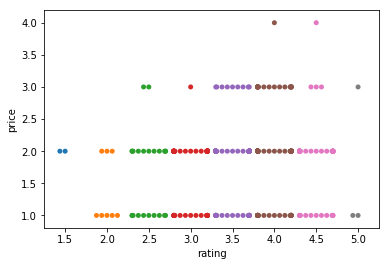

In [208]:
ax = sns.swarmplot(x='rating',y='price', data=result)

** The figure shows restaurants with low prices (1 and 2 ) have similar distribution among each rating range (from 1.5 to 5). However, restaurants with high prices (3 and 4 ) often have higher rating (from 3.5 to 5)**

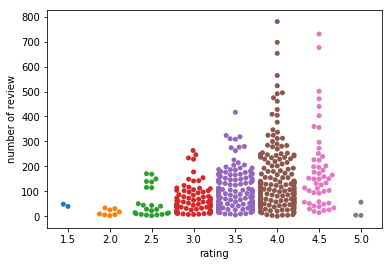

In [209]:
ax = sns.swarmplot(x='rating',y='number of review', data=result)

** The figure shows that the majority of restaurants receive reviews less than 200. However, there are a few restaurant receive reviews more than 600 with rating at 4.0 and 4.5, which are worthy to investigate further.**

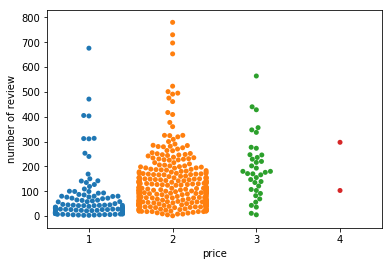

In [215]:
ax = sns.swarmplot(x='price',y='number of review', data=result)

**The figure shows that most restaurants are in price (2), among which the restaurants receive highest number of review.**

## Pairwise plot

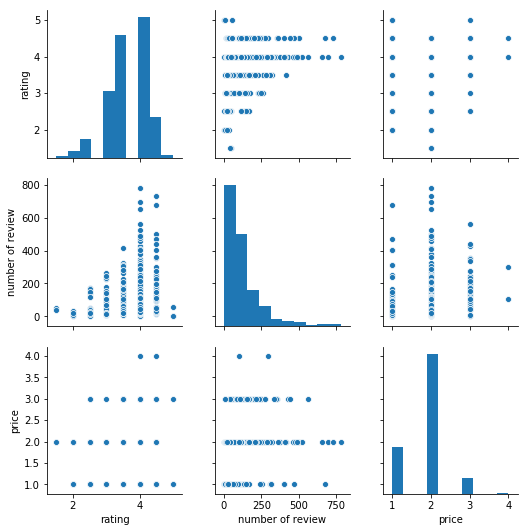

In [213]:
sns.pairplot(result, vars=["rating", "number of review","price"])

## Find the best restaurant based on review and rating

In [25]:
candidates = result[result['number of review'] > 500].sort_values(by=['rating','number of review'],ascending=False)
candidates

,name,price,rating,number of review
94,North Market,2,4.5,730
331,Los Guachos Taqueria,1,4.5,676
30,Akai Hana,2,4.5,501
98,Wolf's Ridge Brewing,2,4.0,780
2,The Pearl,2,4.0,697
127,Marcella's,2,4.0,653
55,Lindey's,3,4.0,564
83,Cooper's Hawk Winery & Restaurant - Columbus,2,4.0,523


** It is found that North Market, Los Guachos Taqueria, and  Akai Hana are the top three restaurant that are reommended to go for seafood. **

# Conclusion

**In this project, we implement yelp api to obtain seafood restaurant data and dig into the data to recommend the best seafood resturants. Unlike online filtering and sorting, the data analysis provides the distribution of price, number of reviews and rating. Highest rating does not mean highest recommendation since there are few reviews. However, if one restaurant has significant more reviews, it shows that it is more popular in that area.** 

# Future directions

**1. To further understand why the restaurant become popular, we can apply natural language processing (NLP) to understand their reviews. **<br>
**2. Including the geolocation (e.g., near campus or supermarket) as a factor for popularity would also be useful. **

# References
1. https://www.crummy.com/software/BeautifulSoup/bs4/doc/#
2. http://nealcaren.github.io/sushi_bars.html
3. https://www.yelp.com/developers/documentation/v3/authentication